___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Time Series with Pandas Project Exercise

For this exercise, answer the questions below given the dataset: https://fred.stlouisfed.org/series/UMTMVS

This dataset is the Value of Manufacturers' Shipments for All Manufacturing Industries.

**Import any necessary libraries.**

In [86]:
# CODE HERE

In [87]:
import numpy as np
import pandas as pd

**Read in the data UMTMVS.csv file from the Data folder**

In [144]:
# CODE HERE

df = pd.read_csv('C:\\Users\\Simon\\Documents_local\\GitHub2\\UdemyTimeSeries\\Udemy_TimeSeries_res\\Data\\UMTMVS.csv')

**Check the head of the data**

In [145]:
# CODE HERE

In [146]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    325 non-null    object 
 1   UMTMVS  325 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.2+ KB


**Set the DATE column as the index.**

In [147]:
# CODE HERE

df['DATE'] = pd.to_datetime(df['DATE'],format=('%Y-%m-%d'), dayfirst=True)
df.set_index('DATE', inplace=True)

In [92]:
df.index = df.index.strftime('%Y-%m')
df.head()

,UMTMVS
DATE,
1992-01,209438.0
1992-02,232679.0
1992-03,249673.0
1992-04,239666.0
1992-05,243231.0


In [93]:
df.head()

,UMTMVS
DATE,
1992-01,209438.0
1992-02,232679.0
1992-03,249673.0
1992-04,239666.0
1992-05,243231.0


In [148]:
df.index

DatetimeIndex(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01',
               '1992-05-01', '1992-06-01', '1992-07-01', '1992-08-01',
               '1992-09-01', '1992-10-01',
               ...
               '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01',
               '2018-12-01', '2019-01-01'],
              dtype='datetime64[ns]', name='DATE', length=325, freq=None)

**Check the data type of the index.**

In [94]:
# CODE HERE

In [149]:
df.index

DatetimeIndex(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01',
               '1992-05-01', '1992-06-01', '1992-07-01', '1992-08-01',
               '1992-09-01', '1992-10-01',
               ...
               '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01',
               '2018-12-01', '2019-01-01'],
              dtype='datetime64[ns]', name='DATE', length=325, freq=None)

**Convert the index to be a datetime index. Note, there are many, many correct ways to do this!**

In [96]:
# CODE HERE

**Plot out the data, choose a reasonable figure size**

<Axes: xlabel='DATE'>

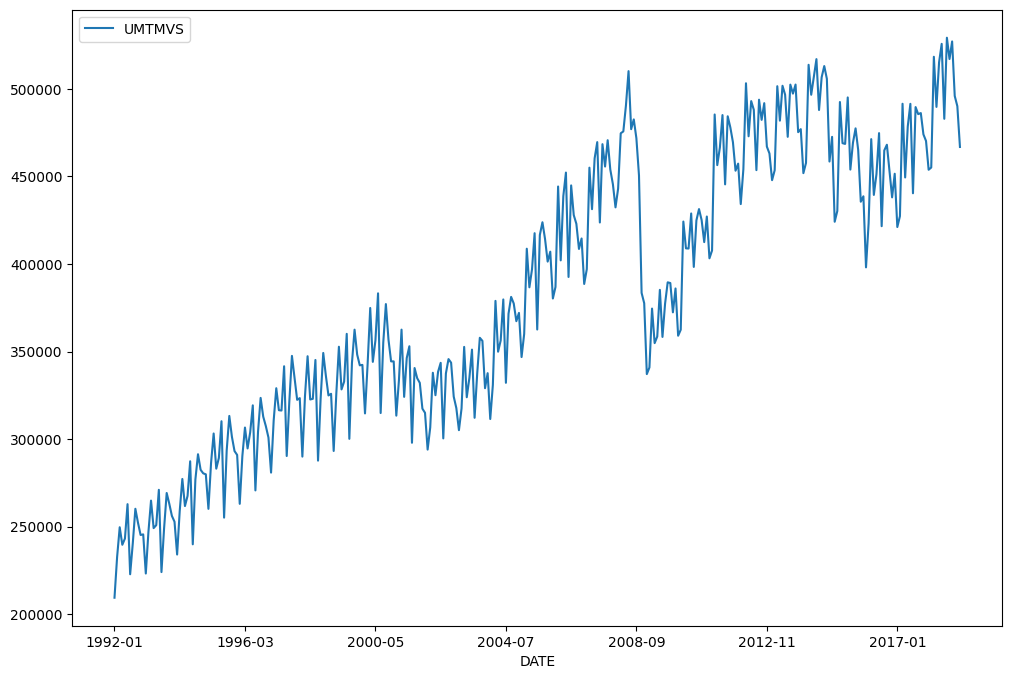

In [97]:
# CODE HERE

df.plot(figsize=(12,8))

**What was the percent increase in value from Jan 2009 to Jan 2019?**

In [98]:
#CODE HERE

In [99]:
startdate = '2009-01'
enddate = '2019-01'
print(df.loc[enddate], df.loc[startdate])
# answer = (df.loc[enddate] - df.loc[startdate]) / df.loc[startdate] *100 
# answer

UMTMVS    466791.0
Name: 2019-01, dtype: float64 UMTMVS    337101.0
Name: 2009-01, dtype: float64


**What was the percent decrease from Jan 2008 to Jan 2009?**

In [100]:
#CODE HERE

startdate = '2008-01'
enddate = '2009-01'

(df.loc[enddate] - df.loc[startdate]) / df.loc[startdate] *100

UMTMVS   -22.022775
dtype: float64

**What is the month with the least value after 2005?** [HINT](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.idxmin.html)

In [168]:
#CODE HERE

after2005 = '2006-01'

df.loc[after2005:].idxmin()
df.loc.idxmin()

AttributeError: '_LocIndexer' object has no attribute 'idxmin'

**What 6 months have the highest value?**

In [138]:
# CODE HERE

# df.index.sort_values('UMTMVS', ascending= False)
df.sort_values('UMTMVS', ascending= False).index[:6]

Index(['2018-08', '2018-10', '2018-06', '2018-03', '2018-09', '2014-06'], dtype='object', name='DATE')

**How many millions of dollars in value was lost in 2008? (Another way of posing this question is what was the value difference between Jan 2008 and Jan 2009)**

In [139]:
# CODE HERE

startdate = '2008-01'
enddate = '2009-01'

df.loc[enddate] - df.loc[startdate]

UMTMVS   -95206.0
dtype: float64

In [142]:
df.index

Index(['1992-01', '1992-02', '1992-03', '1992-04', '1992-05', '1992-06',
       '1992-07', '1992-08', '1992-09', '1992-10',
       ...
       '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09',
       '2018-10', '2018-11', '2018-12', '2019-01'],
      dtype='object', name='DATE', length=325)

**Create a bar plot showing the average value in millions of dollars per year**

<Axes: xlabel='DATE'>

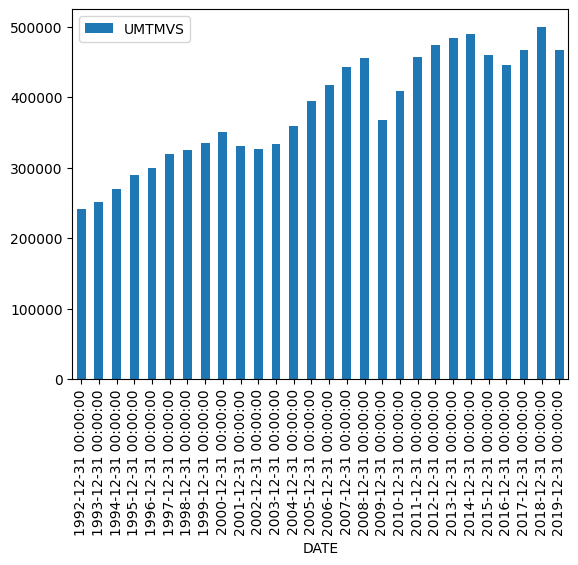

In [151]:
# CODE HERE

df.resample(rule='A').mean().plot.bar()

**What year had the biggest increase in mean value from the previous year's mean value? (Lots of ways to get this answer!)**

[HINT for a useful method](https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.DataFrame.idxmax.html)

In [170]:
# CODE HERE

df_year = df.resample(rule='A').mean()
df_year['year_shift'] = df_year.shift(1)
df_year['yearly_dif'] = df_year['UMTMVS']-df_year['year_shift']
df_year['yearly_dif'].idxmax()


Timestamp('2011-12-31 00:00:00')

**Plot out the yearly rolling mean on top of the original data. Recall that this is monthly data and there are 12 months in a year!**

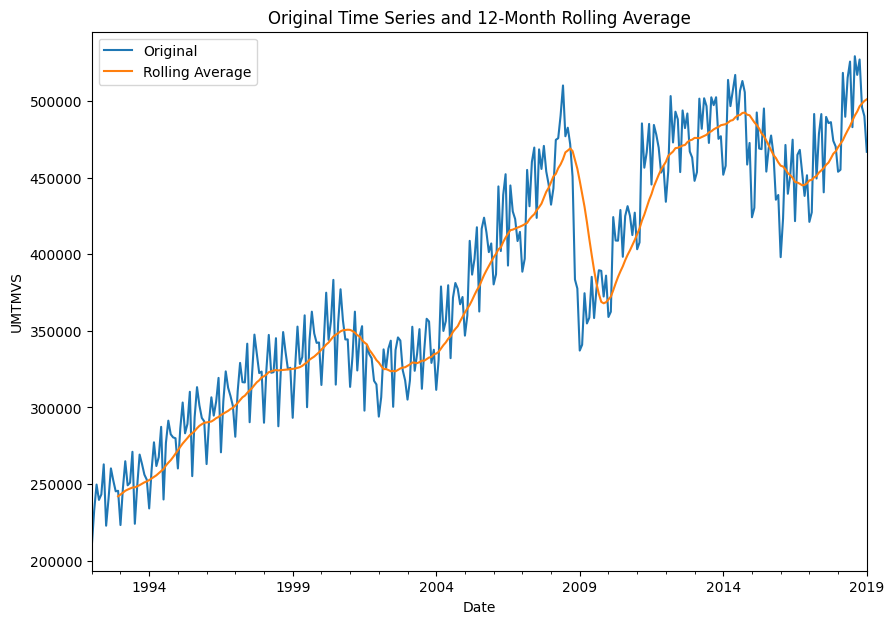

In [179]:
# CODE HERE
import matplotlib.pyplot as plt
# df['UMTMVS'].plot(figsize=(10,7))
# df.rolling(window=12).mean()['UMTMVS'].plot;

# Plot the original time series
df['UMTMVS'].plot(figsize=(10,7), label='Original')

# Plot the 12-month rolling average
df.rolling(window=12).mean()['UMTMVS'].plot(label='Rolling Average')

# Add labels and legend
plt.title('Original Time Series and 12-Month Rolling Average')
plt.xlabel('Date')
plt.ylabel('UMTMVS')
plt.legend()

# Show the plot
plt.show()


**BONUS QUESTION (HARD).**

**Some month in 2008 the value peaked for that year. How many months did it take to surpass that 2008 peak? (Since it crashed immediately after this peak) There are many ways to get this answer. NOTE: I get 70 months as my answer, you may get 69 or 68, depending on whether or not you count the start and end months. Refer to the video solutions for full explanation on this.**

In [107]:
#CODE HERE

# GREAT JOB!